<a href="https://colab.research.google.com/github/m-zayed5722/Miscellaneous-Projects/blob/main/DS_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone -q https://github.com/learnwithraghu/python-interview-question-de-ds-ai.git

In [3]:
%cd python-interview-question-de-ds-ai
!ls -lah


/content/python-interview-question-de-ds-ai
total 32K
drwxr-xr-x 5 root root 4.0K Oct 12 03:46 .
drwxr-xr-x 1 root root 4.0K Oct 12 03:46 ..
drwxr-xr-x 2 root root 4.0K Oct 12 03:46 generate_data
drwxr-xr-x 8 root root 4.0K Oct 12 03:46 .git
-rw-r--r-- 1 root root 2.8K Oct 12 03:46 hint_doc.md
-rw-r--r-- 1 root root 3.7K Oct 12 03:46 InterviewQuestion.md
-rw-r--r-- 1 root root 3.5K Oct 12 03:46 README.md
drwxr-xr-x 2 root root 4.0K Oct 12 03:46 solutions


In [4]:
%cd generate_data/
!ls

/content/python-interview-question-de-ds-ai/generate_data
card_access_logs.json	 generate_case_data.py
dining_transactions.csv  passenger_manifest.csv


In [ ]:
%cd python-interview-question-de-ds-ai
!ls

/content/python-interview-question-de-ds-ai
generate_data  hint_doc.md  InterviewQuestion.md  README.md  solutions


In [ ]:
!ls

card_access_logs.json	 generate_case_data.py
dining_transactions.csv  passenger_manifest.csv


In [5]:
import pandas as pd

# Read a CSV file
df = pd.read_csv("dining_transactions.csv")

# Display the first few rows
print(df.head())

  transaction_id passenger_id              item  amount            timestamp
0           T001         P001   Seafood Platter   45.99  2024-02-20 19:30:00
1           T002         P002  Vegetarian Pasta   28.50  2024-02-20 20:15:00
2           T004         P004             Steak   52.99  2024-02-20 20:00:00
3           T005         P005      Fish Special   38.99  2024-02-20 19:45:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  4 non-null      object 
 1   passenger_id    4 non-null      object 
 2   item            4 non-null      object 
 3   amount          4 non-null      float64
 4   timestamp       4 non-null      object 
dtypes: float64(1), object(4)
memory usage: 292.0+ bytes


In [ ]:
df.describe()

,amount
count,4.00000
mean,41.61750
std,10.44709
min,28.50000
25%,36.36750
50%,42.49000
75%,47.74000
max,52.99000


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
transaction_id,0.0
passenger_id,0.0
item,0.0
amount,0.0
timestamp,0.0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

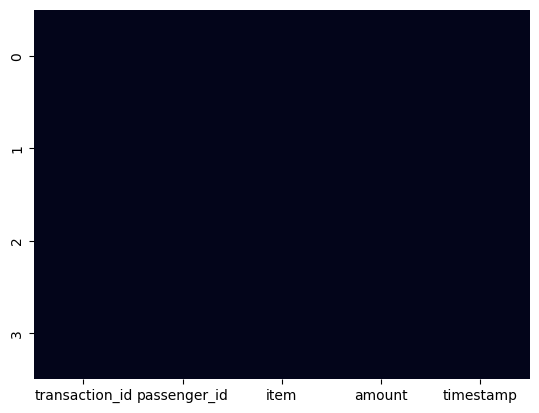

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [6]:
# might return: object
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].dtype

dtype('<M8[ns]')

In [ ]:
###############################################################################################################
###############################################################################################################

In [7]:
# Read a CSV file
df2 = pd.read_csv("passenger_manifest.csv")

# Display the first few rows
print(df2.head())

  passenger_id             name cabin dining_preference  age nationality
0         P001     James Wilson  A123             Early   45     British
1         P002  Elena Rodriguez  B145              Late   32     Spanish
2         P003       Sarah Chen  A125             Early   28     Chinese
3         P004    Michael Brown  C201              Late   52    American
4         P005    Lisa Thompson  B147             Early   39    Canadian


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   passenger_id       5 non-null      object
 1   name               5 non-null      object
 2   cabin              5 non-null      object
 3   dining_preference  5 non-null      object
 4   age                5 non-null      int64 
 5   nationality        5 non-null      object
dtypes: int64(1), object(5)
memory usage: 372.0+ bytes


In [ ]:
df2.describe()

,age
count,5.000000
mean,39.200000
std,9.679876
min,28.000000
25%,32.000000
50%,39.000000
75%,45.000000
max,52.000000


In [ ]:
(df2.isnull().sum() / len(df2)) * 100

,0
passenger_id,0.0
name,0.0
cabin,0.0
dining_preference,0.0
age,0.0
nationality,0.0


In [ ]:
df2.isnull().sum().sum()

np.int64(0)

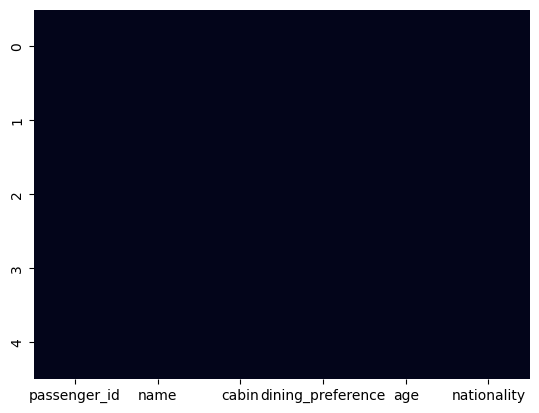

In [ ]:
sns.heatmap(df2.isnull(), cbar=False)
plt.show()

In [9]:
df2['timestamp'].dtype
# might return: object


In [ ]:
########################################################################################################################
########################################################################################################################

In [10]:
# Read a JSON file into a DataFrame
df3 = pd.read_json("card_access_logs.json")

# Show the first few rows
print(df3.head())

            timestamp passenger_id     location action
0 2024-02-20 19:00:00         P001        Cabin  entry
1 2024-02-20 19:00:00         P002        Cabin  entry
2 2024-02-20 19:00:00         P004        Cabin  entry
3 2024-02-20 19:00:00         P005        Cabin  entry
4 2024-02-20 20:00:00         P001  Dining Hall   exit


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     20 non-null     datetime64[ns]
 1   passenger_id  20 non-null     object        
 2   location      20 non-null     object        
 3   action        20 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 772.0+ bytes


In [ ]:
df3.describe()

,timestamp
count,20
mean,2024-02-20 21:00:00
min,2024-02-20 19:00:00
25%,2024-02-20 20:00:00
50%,2024-02-20 21:00:00
75%,2024-02-20 22:00:00
max,2024-02-20 23:00:00


In [ ]:
(df3.isnull().sum() / len(df3)) * 100

,0
timestamp,0.0
passenger_id,0.0
location,0.0
action,0.0


In [ ]:
df3.isnull().sum().sum()

np.int64(0)

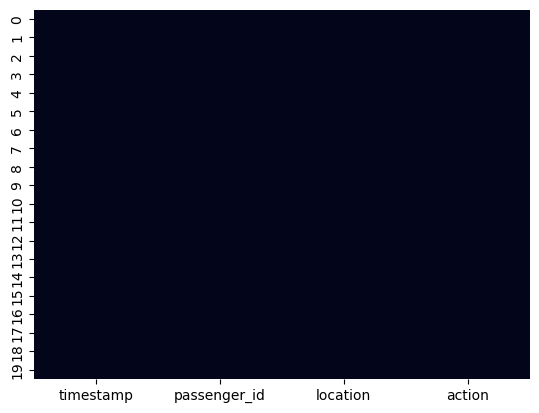

In [ ]:
sns.heatmap(df3.isnull(), cbar=False)
plt.show()

In [11]:
# might return: object
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3['timestamp'].dtype


dtype('<M8[ns]')

In [12]:
import pandas as pd
from pandas import json_normalize

# Load JSON
with open('card_access_logs.json') as f:
    df4 = pd.read_json(f)

# Flatten nested fields
df_flat = pd.json_normalize(df4, sep='_')  # sep defines nested column names


In [ ]:
df_flat

""
0
1
2
3


In [14]:
df_combined = pd.concat([df, df2, df3], ignore_index=True)

In [15]:
df_combined.head()

,transaction_id,passenger_id,item,amount,timestamp,name,cabin,dining_preference,age,nationality,location,action
0,T001,P001,Seafood Platter,45.99,2024-02-20 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T002,P002,Vegetarian Pasta,28.50,2024-02-20 20:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T004,P004,Steak,52.99,2024-02-20 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T005,P005,Fish Special,38.99,2024-02-20 19:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,P001,NaN,NaN,NaT,James Wilson,A123,Early,45.0,British,NaN,NaN


In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     4 non-null      object        
 1   passenger_id       29 non-null     object        
 2   item               4 non-null      object        
 3   amount             4 non-null      float64       
 4   timestamp          24 non-null     datetime64[ns]
 5   name               5 non-null      object        
 6   cabin              5 non-null      object        
 7   dining_preference  5 non-null      object        
 8   age                5 non-null      float64       
 9   nationality        5 non-null      object        
 10  location           20 non-null     object        
 11  action             20 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 2.8+ KB


In [ ]:
# Show the first ~2000 chars of the task doc
#!sed -n '1,150p' InterviewQuestion.md


In [ ]:
from glob import glob
csvs  = glob("**/*.csv", recursive=True)
jsons = glob("**/*.json", recursive=True)
csvs, jsons


(['generate_data/dining_transactions.csv',
  'generate_data/passenger_manifest.csv'],
 ['generate_data/card_access_logs.json'])